In [3]:
!pip install ultralytics opencv-python

  Using cached ultralytics-8.3.38-py3-none-any.whl.metadata (35 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached torch-2.5.1-cp310-cp310-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp310-cp310-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.12-py3-none-any.whl.metadata (9.4 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cu

In [ ]:
import os
import pandas as pd
import cv2

# Paths
kaggle_data_dir = '/home/jupyter/advanced_cv_project/kaggle_data/extracted_images'
train_labels_csv = '/home/jupyter/advanced_cv_project/kaggle_data/train_labels.csv'
test_labels_csv = '/home/jupyter/advanced_cv_project/kaggle_data/test_labels.csv'

# Output directories
train_images_dir = '/home/jupyter/advanced_cv_project/dataset/train/images'
train_labels_dir = '/home/jupyter/advanced_cv_project/dataset/train/labels'
val_images_dir = '/home/jupyter/advanced_cv_project/dataset/val/images'
val_labels_dir = '/home/jupyter/advanced_cv_project/dataset/val/labels'

os.makedirs(train_images_dir, exist_ok = True)
os.makedirs(train_labels_dir, exist_ok = True)
os.makedirs(val_images_dir, exist_ok = True)
os.makedirs(val_labels_dir, exist_ok = True)

# Function to convert annotations
def convert_annotations(csv_file, images_src_dir, images_dst_dir, labels_dst_dir):
    df = pd.read_csv(csv_file)
    for _, row in df.iterrows():
        image_name = row['image']
        class_id = 0  # Assuming you have one class 'car'; change accordingly
        x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']

        # Load image to get dimensions
        img_path = os.path.join(images_src_dir, image_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image {img_path}")
            continue
        height, width, _ = img.shape

        # Convert coordinates to YOLO format
        x_center = ((x1 + x2) / 2) / width
        y_center = ((y1 + y2) / 2) / height
        bbox_width = (x2 - x1) / width
        bbox_height = (y2 - y1) / height

        # Create label file
        label_path = os.path.join(labels_dst_dir, image_name.replace('.jpg', '.txt'))
        with open(label_path, 'w') as f:
            f.write(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}\n")

        # Copy image to destination directory
        dst_image_path = os.path.join(images_dst_dir, image_name)
        if not os.path.exists(dst_image_path):
            cv2.imwrite(dst_image_path, img)

# Convert train annotations
convert_annotations(
    train_labels_csv,
    os.path.join(kaggle_data_dir, 'train/cars_train'),
    train_images_dir,
    train_labels_dir
)

# Convert test annotations (we'll use test data as validation set)
convert_annotations(
    test_labels_csv,
    os.path.join(kaggle_data_dir, 'test/cars_test'),
    val_images_dir,
    val_labels_dir
)

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # You can choose 'yolov8s.pt' or 'yolov8m.pt' for better accuracy

# Train the model on your dataset
model.train(data = '/home/jupyter/advanced_cv_project/data.yaml', epochs = 25, imgsz = 640)

In [ ]:
# Save the trained model
model.save("/home/jupyter/advanced_cv_project/yolov8_car_detection_ks.pt")

In [ ]:
# Load the fine-tuned YOLO model
model = YOLO("/home/jupyter/advanced_cv_project/yolov8_car_detection_ks.pt")

# Perform inference on the scraped data
results = model.predict(source="/home/jupyter/advanced_cv_project/scraped_data/car_images_v2/", save = True, verbose = False)

# The results will be saved in "runs/predict/" by default

In [ ]:
# for result in results:
#     print(f"Image: {result.path}")
#     for box in result.boxes:
#         coords = box.xyxy.cpu().numpy()  # Bounding box [x1, y1, x2, y2]
#         confidence = box.conf.cpu().numpy()  # Confidence score
#         class_id = box.cls.cpu().numpy()  # Class ID
#         print(f"Box: {coords}, Confidence: {confidence}, Class ID: {class_id}")


In [1]:
!ls /home/jupyter/advanced_cv_project/notebooks/runs/detect/predict/ -lht | head -6

total 2.5G
-rw-r--r-- 1 root root 113K Nov 26 22:19 2025_volkswagen_jetta_gli_autobahn_20417.jpg
-rw-r--r-- 1 root root 120K Nov 26 22:19 2025_volkswagen_jetta_gli_autobahn_20416.jpg
-rw-r--r-- 1 root root  29K Nov 26 22:19 2025_volkswagen_jetta_gli_autobahn_20415.jpg
-rw-r--r-- 1 root root  76K Nov 26 22:19 2025_volkswagen_jetta_gli_autobahn_20414.jpg
-rw-r--r-- 1 root root  53K Nov 26 22:19 2025_volkswagen_jetta_gli_autobahn_20413.jpg
ls: write error: Broken pipe


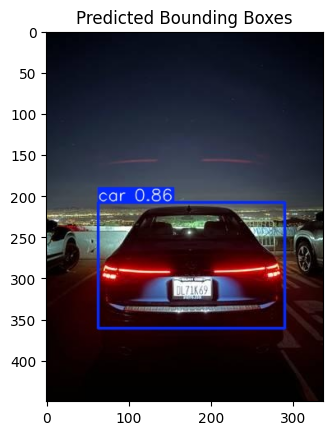

In [5]:
import cv2
import matplotlib.pyplot as plt

image_path = "/home/jupyter/advanced_cv_project/notebooks/runs/detect/predict/2025_volkswagen_jetta_gli_autobahn_20415.jpg"  # Example predicted image path
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Predicted Bounding Boxes")
plt.show()

In [ ]:
# from ultralytics import YOLO

# # Load the YOLO model
# model = YOLO("/home/jupyter/advanced_cv_project/yolov8_car_detection_ks.pt")

# # Perform inference on the scraped data
# results = modewl.predict(source="/home/jupyter/advanced_cv_project/scraped_data/car_images/", save=True, verbose)

# Confidence threshold
CONFIDENCE_THRESHOLD = 0.5

# List to store images with low detection confidence
low_confidence_images = []

# Process results
for result in results:
    image_path = result.path
    confidences = [box.conf.cpu().item() for box in result.boxes]
    
    # Check if all detections have confidence below the threshold
    if all(conf < CONFIDENCE_THRESHOLD for conf in confidences):
        low_confidence_images.append(image_path)
        # print(f"Low confidence image: {image_path}, Confidences: {confidences}")

# Save the low-confidence images to a file
with open("low_confidence_images.txt", "w") as f:
    for image in low_confidence_images:
        f.write(image + "\n")

print(f"Total low-confidence images: {len(low_confidence_images)}")

In [ ]:
import cv2
import matplotlib.pyplot as plt

for image_path in low_confidence_images:
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Low Confidence: {image_path}")
    plt.show()